Coefficients: [[ 0.54412968 -0.02559836  0.16484404  0.34223767 -0.00276401  0.08592511
   0.00267279  0.09722918  0.0693561   0.00653927  0.01543574]]
Mean Error: 0.46
R-squared: 0.34


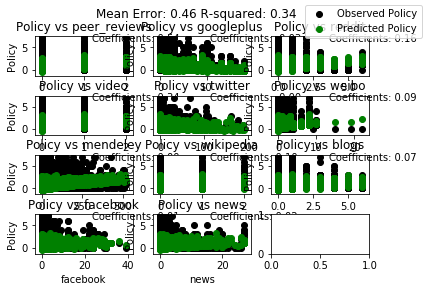

             precision    recall  f1-score   support

          0       0.69      0.97      0.81     17955
          1       0.72      0.37      0.49     10452
          2       0.21      0.02      0.04      1726
          3       0.00      0.00      0.00       520
          4       0.00      0.00      0.00       212
          5       0.00      0.00      0.00        89
          6       0.00      0.00      0.00        53
          7       0.00      0.00      0.00        33

avg / total       0.65      0.69      0.63     31040



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from scipy import stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report
# dataset file
filename = 'cleanseddata.csv'
col_headers = 'altmetric_id	mendeley	citeulike	connotea	twitter	reddit	facebook	googleplus	blogs	news	video	wikipedia	q&a	pinterest	weibo	peer_reviews	policy'
col_headers = col_headers.split()
tmp = {}
for i in range(len(col_headers)):
    tmp[col_headers[i]] = i
col_headers_index = tmp

# parameters
src_col_label = ['peer_reviews',  'googleplus', 'reddit',  'video', 'twitter', 'weibo', 'mendeley', 'wikipedia', 'blogs', 'facebook', 'news']

#src_col_label = ['peer_reviews',  'video', 'wikipedia']
sournce_columns = [col_headers_index[col_label] for col_label in src_col_label ]
target_column = [col_headers_index['policy']]
percent_train_data = 80

# Load the mydataset mydataset
all_dataset = pd.read_csv(filename)

# remove the outliers
all_dataset = all_dataset[(np.abs(stats.zscore(all_dataset)) < 3).all(axis=1)]

# shuffle data
all_dataset = all_dataset.sample(frac=1)
all_dataset = all_dataset.sample(frac=1)
all_dataset = all_dataset.sample(frac=1)
all_dataset = all_dataset.sample(frac=1)
all_dataset = all_dataset.sample(frac=1)
no_train_data = int (percent_train_data * len(all_dataset) / 100)
#print ('Num. of train date: %d', no_train_data)
pd_data = all_dataset.iloc[:, sournce_columns]
pd_target = all_dataset.iloc[:,target_column]
mydataset = datasets.base.Bunch(data=pd_data, target = pd_target)
csv_reader = csv.reader(open('cleanseddata.csv', newline=''), delimiter=' ', quotechar='|')
mydataset_X = mydataset.data

# Split the data into training/testing sets
mydataset_X_train = mydataset_X[:no_train_data]
mydataset_X_test = mydataset_X[no_train_data:]

# Split the targets into training/testing sets
mydataset_y_train = mydataset.target[:no_train_data]
mydataset_y_test = mydataset.target[no_train_data:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(mydataset_X_train, mydataset_y_train)

# Make predictions using the testing set
mydataset_y_pred = regr.predict(mydataset_X_test)

# The coefficients
print('Coefficients: %s' % str(regr.coef_))

# The Mean Error
mse = mean_squared_error(mydataset_y_test, mydataset_y_pred)
print("Mean Error: %.2f" % mse )

# Explained variance score: 1 is perfect prediction
var_score = r2_score(mydataset_y_test, mydataset_y_pred)
print('R-squared: %.2f' % var_score)

def get_ith_column_of_dataframe(df, i, frm_row = 0, to_row = None):
    '''
    Returns the i-th column of a pandas dataframe from frm_row to to_row
    '''    
    if to_row is None:
        to_row = len(df)
    return [row[0] for row in df.iloc[:,[i]].values.tolist()][frm_row: to_row]


def get_it_column_of_skl_bunch(bunch, i, frm_row = 0, to_row = None):
    '''
    Returns the i-th column of a sklearn Bunch from frm_row to to_row
    '''    
    if to_row is None:
        to_row = len(bunch)
    return [row[i] for row in bunch[frm_row: to_row] ]

def main():
    ax_nrow = 4
    ax_ncol = 3

    plt.close('all')

    f, ax = plt.subplots(ax_nrow, ax_ncol)
    idx = 0
    for i in sournce_columns:    
        
        ix = int(idx / ax_ncol)
        jx = idx % ax_ncol
        
        # print (i, ix, jx)

    
        mydataset_X_test_1D = [i[0] for i in all_dataset.iloc[:,[i]].values.tolist()][no_train_data:]
        mydataset_X_test_1D = get_ith_column_of_dataframe(all_dataset, i, frm_row = no_train_data)
        mydataset_y_test_1D = get_ith_column_of_dataframe(all_dataset, target_column[0], frm_row = no_train_data)
        sc1 = ax[ix, jx].scatter(mydataset_X_test_1D, mydataset_y_test_1D,  color='black')

        # draw the regression line for each line 
       
        ax[ix, jx].set_xlabel(col_headers[i])
        ax[ix, jx].set_ylabel('Policy')
        ax[ix, jx].set_title('Policy vs %s' %(col_headers[i],))

        # Report the Mean Error on the graphs
        result_value = 'Coefficients: %.2f ' % regr.coef_[0][idx] 

        mydataset_y_pred_1D = get_it_column_of_skl_bunch( mydataset_y_pred, 0 )
        max_y = max( mydataset_y_test_1D + mydataset_y_pred_1D ) * 0.9
        max_x = max( mydataset_X_test_1D ) * 0.6

        sc2 = ax[ix, jx].scatter(mydataset_X_test_1D, mydataset_y_pred_1D,  color='green')

        ax[ix, jx].text(max_x, max_y, result_value, fontsize=10)
        idx += 1    

    f.suptitle('Mean Error: %.2f R-squared: %.2f'% ( mse, var_score))
    f.legend([sc1, sc2], ["Observed Policy", "Predicted Policy"], 'upper right')

    f.subplots_adjust(hspace=.5)

    plt.show()

main()
mydataset_y_pred = mydataset_y_pred.astype(int)
print(classification_report(mydataset_y_test, mydataset_y_pred))



